In [1]:
# CNN으로 MNIST 분류 문제 풀기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop 
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 입력과 출력 지정하기
im_rows = 28 # 이미지의 높이
im_cols = 28 # 이미지의 너비
im_color = 1 # 이미지의 색공간 / 그레이스케일
in_shape = (im_rows, im_cols, im_color)
out_size = 10

In [3]:
# MNIST 데이터 읽어 들이기 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 읽어들인 데이터를 3차원 배열로 변환하기
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype('float32') / 255

In [5]:
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [6]:
# CNN모델의 구조 정의하기 --- (*2)
model = Sequential()
model.add(Conv2D(32, 
          kernel_size=(3, 3),
          activation='relu',
          input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [7]:
# 모델 컴파일하기 
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [8]:
# 학습 실행하기
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2106 - accuracy: 0.9365 - val_loss: 0.0535 - val_accuracy: 0.9828
Epoch 2/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0426 - val_accuracy: 0.9855
Epoch 3/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0598 - accuracy: 0.9827 - val_loss: 0.0349 - val_accuracy: 0.9883
Epoch 4/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0521 - accuracy: 0.9852 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 5/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0393 - val_accuracy: 0.9871
Epoch 6/12
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 7/12
60000/60000 [==============================] - 221

In [9]:
# 모델 평가하기 
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

10000/10000 [==============================] - 10s 970us/step
정답률= 0.9894999861717224 loss= 0.03654796427242782


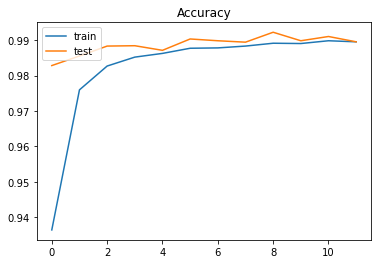

In [10]:
# 정답률 추이를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

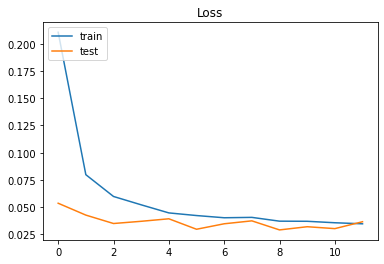

In [11]:
# 손실 추이를 그래프로 그리기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()